In [25]:
from fastspt import simulate, fit2, tracklen, version, readers
import numpy as np
import logging
from glob import glob

logging.basicConfig(level=logging.INFO)
%matplotlib inline

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
version.__version__

'19.0-dev'

# Open dataset

In [26]:
path = '/Volumes/@MCM/Andrey/data/2019/0808-Daiki-Niceria-Men/S1-PILE-mCherry/*/*.xml'
paths = glob(path)
len(paths)

2

In [17]:
tracks = readers.read_trackmate_xml(path)

INFO:fastspt.tracklen:1518 tracks, 8612 localizations
INFO:fastspt.tracklen:Fit result: 3172 * e^(-0.56x)


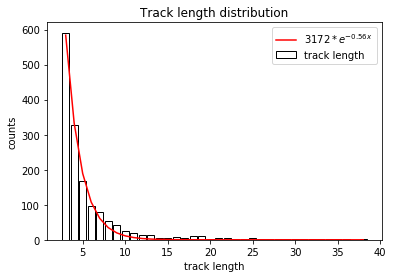

In [18]:
len_fit = tracklen.get_track_lengths_dist(tracks,)

# 2. Fit kinetics

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1518 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.12645983]), array([0.65561708, 0.34438292])),             1 lags


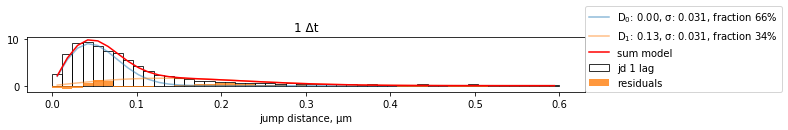

In [19]:
# fit one lag (1 Δt)
fit = fit2.fit_spoton_2_0(tracks)

In [27]:
fit['fit_result']

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (True, True)
INFO:fastspt.fit2:Total 1518 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([3.86851928e-09, 8.12108344e-02]), array([0.74865662, 0.25134338])),             7 lags


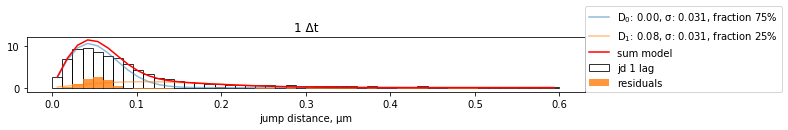

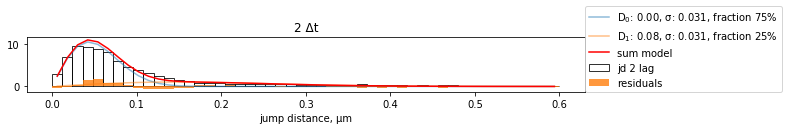

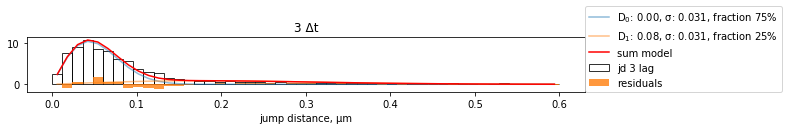

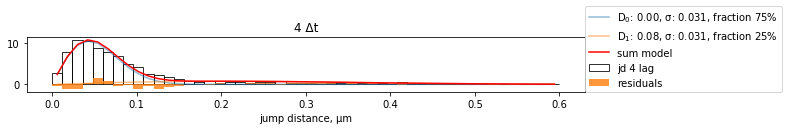

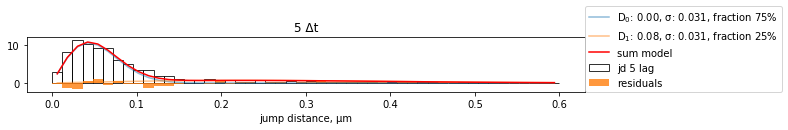

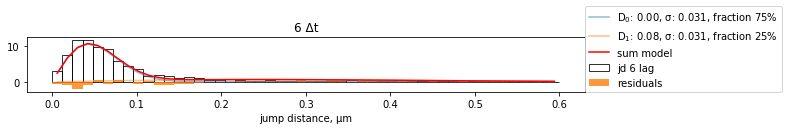

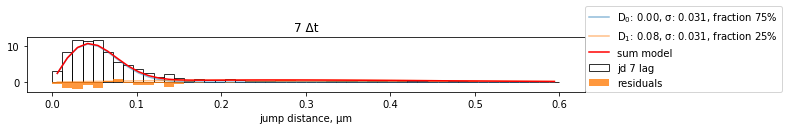

In [21]:
# fit 5 lags (1..5 Δt)

fit = fit2.fit_spoton_2_0(tracks, n_lags=7, return_fit_result=1, D=(0.05, 0.5), n_bins=50, max_um=0.6)

In [22]:
fit['fit_result']

## fit 3 states

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None, fit_D: (1, 1, 1)
INFO:fastspt.fit2:Total 1518 tracks
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.02448607, 0.2376287 ]), array([0.70753866, 0.15307793, 0.13938341])),             7 lags


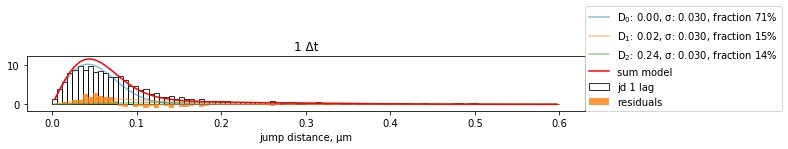

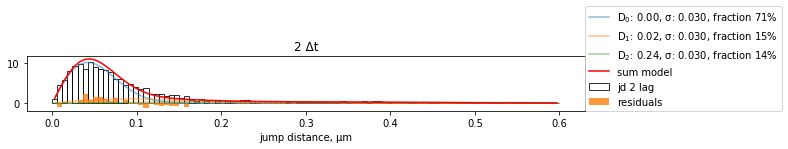

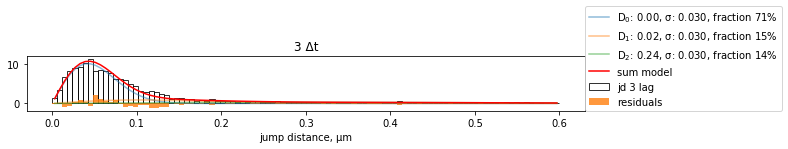

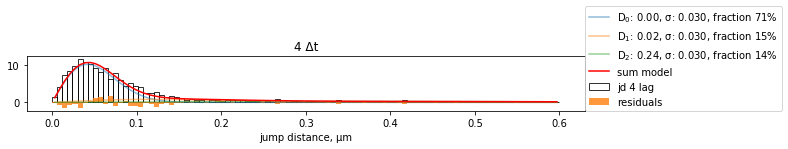

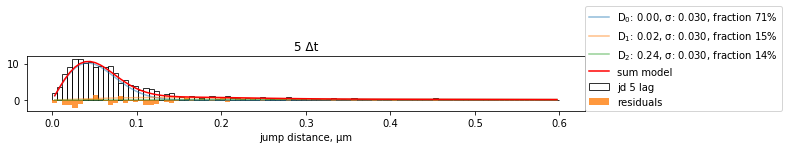

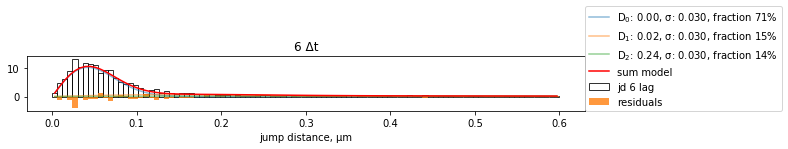

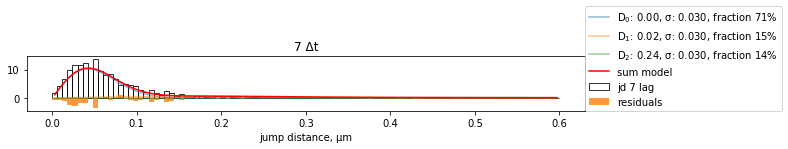

In [24]:
# Try 3-states fit

fit_3_states = fit2.fit_spoton_2_0(
    tracks, 
    n_lags=7, 
    n_bins=100,
    D=(0,0.05,0.2),
    fit_D=(1,1,1,),
    F=(0.3,0.3,0.4),
    fit_F=(1,1,1)
)

In [20]:
fit_3_states['chi2']

5.041627618592502

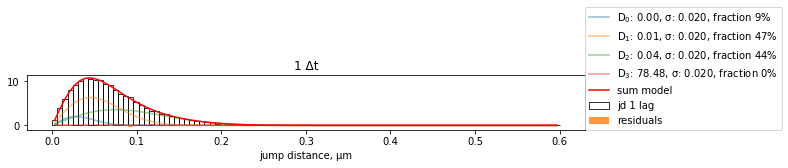

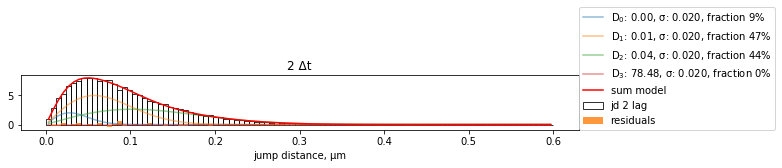

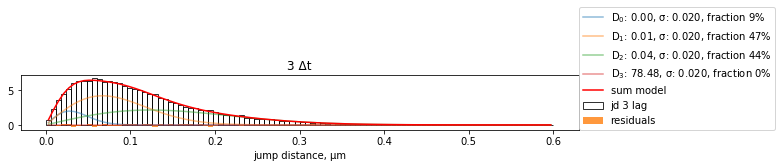

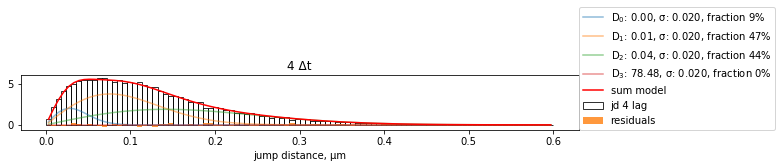

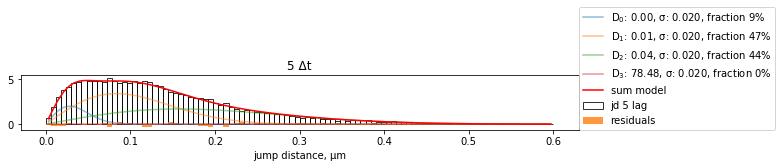

In [21]:
# 4 states, maybe?? Why not!


fit_4_states = fit2.fit_spoton_2_0(
    tracks_3_states, 
    n_lags=5, 
    n_bins=100,
    D=(0,0.01,0.2,0.3),
    fit_D=(1,1,1,1),
    F=(0.3,0.3,0.2,0.2),
    fit_F=(1,1,1,1)
)

In [22]:
fit_4_states

{'sigma': [0.019857755069429224],
 'D': [0.0, 0.01025167088764034, 0.04007692146304387, 78.4774174727437],
 'F': [0.09296470592485878,
  0.46642395753273796,
  0.43928939932494926,
  0.001321937217453939],
 'dt': 0.06,
 'n_tracks': 2000,
 'chi2': 5.037703873187275,
 'chi2_norm': 0.01007540774637455,
 'n_iter': 243,
 'path': None}

In [23]:
fit_4_states['chi2']

5.037703873187275

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fit of 3-states simulated data')

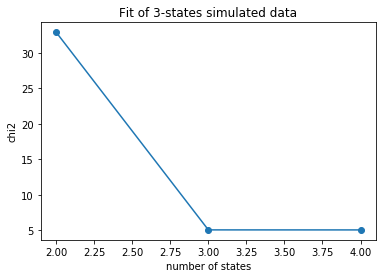

In [25]:
all_fits = [fit_2_states, fit_3_states, fit_4_states]
chi2s = [f['chi2'] for f in all_fits]
n_states = [len(f['D']) for f in all_fits]
plt.plot(n_states, chi2s, 'o-')
plt.xlabel('number of states')
plt.ylabel('chi2')
plt.title('Fit of 3-states simulated data')


## Test the speed

In [27]:
# simulate 10 2-states datasets 
data = [simulate.tracks(num_tracks=1e3, D_bound=0.0, D_free=0.05, use_tqdm=False) for _ in fit2.tqdm(range(10))]

In [28]:
fits = [fit2.fit_spoton_2_0(d, D=(0., .1),plot=False, n_lags=1, max_um=0.5, n_bins=50) for d in fit2.tqdm(data)]

In [29]:
fit2.result_2_table(*fits)

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter
replicate,,,,,,,,,,
0,0.019786,0.0,0.050779,0.104552,0.895448,0.06,1000,0.425607,0.008512,26
1,0.019673,0.0,0.050113,0.083410,0.916590,0.06,1000,0.678052,0.013561,36
2,0.020754,0.0,0.051080,0.085100,0.914900,0.06,1000,0.609460,0.012189,36
3,0.019448,0.0,0.049786,0.084751,0.915249,0.06,1000,0.827993,0.016560,31
4,0.018902,0.0,0.048819,0.063716,0.936284,0.06,1000,0.569603,0.011392,36
5,0.019363,0.0,0.050604,0.093731,0.906269,0.06,1000,0.407509,0.008150,36
6,0.021363,0.0,0.049585,0.086957,0.913043,0.06,1000,0.389276,0.007786,31
7,0.021740,0.0,0.048710,0.081642,0.918358,0.06,1000,0.580215,0.011604,31
8,0.019565,0.0,0.049747,0.074242,0.925758,0.06,1000,0.550628,0.011013,31


In [30]:
# 2 unbound states
print('simulate 10 datasets')
data = [simulate.tracks(num_tracks=4e3, D_bound=0.05, D_free=0.5, use_tqdm=False) for _ in fit2.tqdm(range(10))]

simulate 10 datasets


In [31]:
# dibabling plot dramatically improves performance!
print('start fit')
fits = [fit2.fit_spoton_2_0(d, D=(0.2, 1),plot=False, n_lags=7, max_um=2, n_bins=50, return_fit_result=True) for d in fit2.tqdm(data)]

start fit


In [32]:
table = fit2.result_2_table(*fits)
table.loc['mean'] = table.mean(0)
table.loc['std'] = table.std(0)
table

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter
replicate,,,,,,,,,,
0,0.025526,0.020775,0.500052,0.100063,0.899937,6.000000e-02,4000.0,0.094199,0.000269,41.000000
1,0.019601,0.021466,0.492160,0.083090,0.916910,6.000000e-02,4000.0,0.101715,0.000291,41.000000
2,0.022591,0.020569,0.500824,0.087468,0.912532,6.000000e-02,4000.0,0.096263,0.000275,54.000000
3,0.021645,0.021537,0.497810,0.098137,0.901863,6.000000e-02,4000.0,0.113228,0.000324,47.000000
4,0.024878,0.019643,0.496886,0.099183,0.900817,6.000000e-02,4000.0,0.113401,0.000324,41.000000
5,0.023008,0.020350,0.504695,0.093184,0.906816,6.000000e-02,4000.0,0.108113,0.000309,74.000000
6,0.021693,0.020282,0.500899,0.092954,0.907046,6.000000e-02,4000.0,0.108953,0.000311,41.000000
7,0.023048,0.020290,0.503449,0.101425,0.898575,6.000000e-02,4000.0,0.087532,0.000250,43.000000
8,0.022137,0.020857,0.504892,0.095843,0.904157,6.000000e-02,4000.0,0.089853,0.000257,41.000000


In [33]:
# simulate unbound molecules
tracks = simulate.tracks(D_bound=0.05, D_free=0.5, num_tracks=4e3)

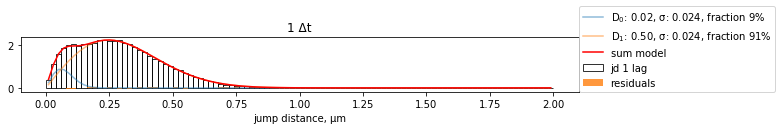

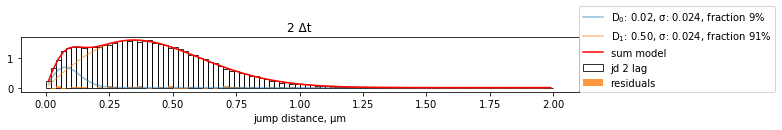

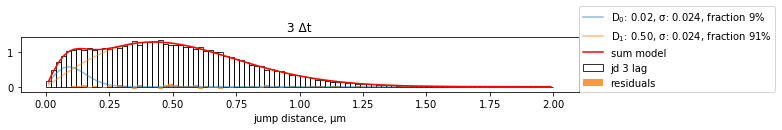

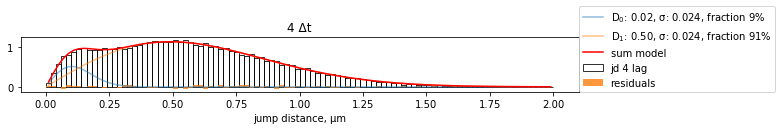

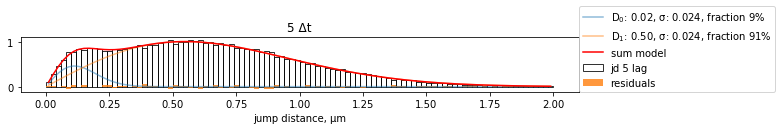

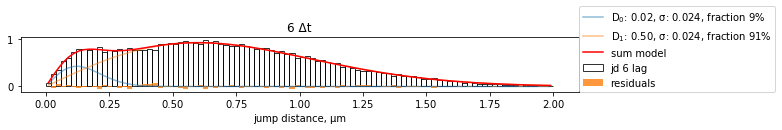

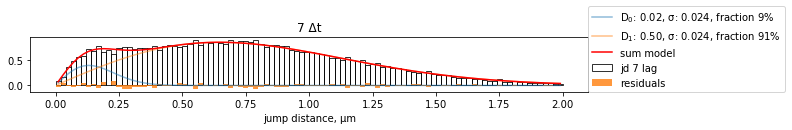

{'sigma': [0.024007714963759395],
 'D': [0.019046179074453162, 0.49701706411206303],
 'F': [0.08593857902330176, 0.9140614209766982],
 'dt': 0.06,
 'n_tracks': 4000,
 'chi2': 0.37489140908747526,
 'chi2_norm': 0.0005355591558392504,
 'n_iter': 42,
 'path': None}

In [34]:
fit2.fit_spoton_2_0(tracks, D=(0.1, 1), max_um=2, n_bins=100, n_lags=7)

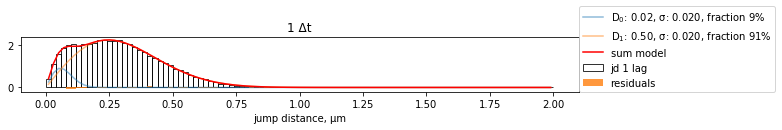

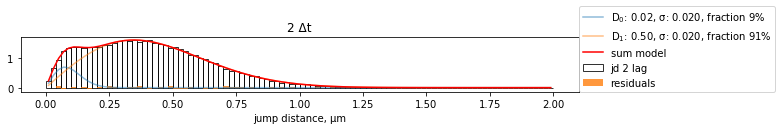

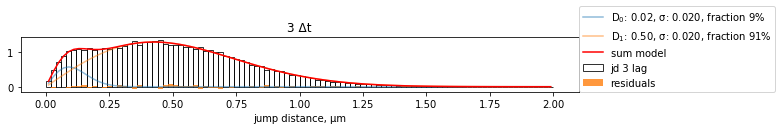

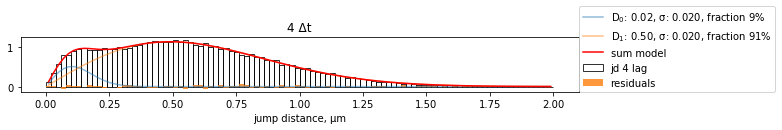

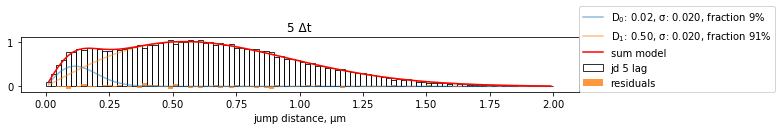

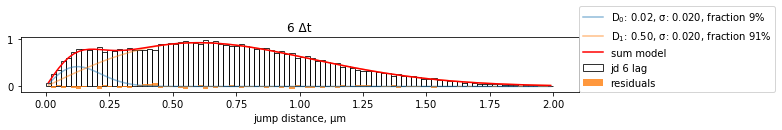

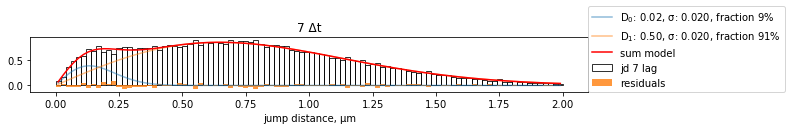

{'sigma': [0.02],
 'D': [0.020201307446218397, 0.49821854510772723],
 'F': [0.08578140068828427, 0.9142185993117158],
 'dt': 0.06,
 'n_tracks': 4000,
 'chi2': 0.3822778390282079,
 'chi2_norm': 0.0005461111986117255,
 'n_iter': 34,
 'path': None}

In [35]:
# fix sigma
fit2.fit_spoton_2_0(tracks, D=(0.1, 1), max_um=2, n_bins=100, n_lags=7, sigma=(0.02,), fit_sigma=(False,))